In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y Dataset')

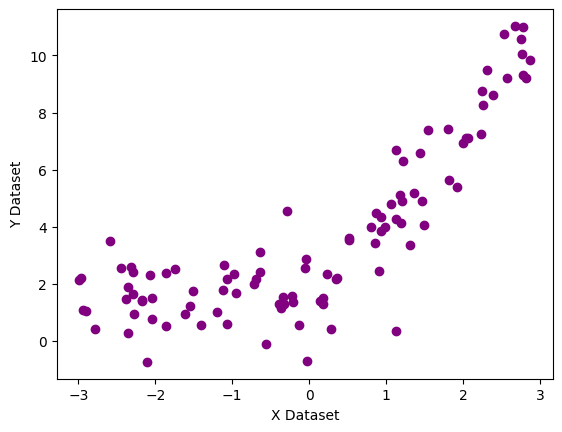

In [3]:
X = 6 * np.random.rand(100, 1) - 3  # 100 rows 1 column and -3 for creating outliers
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)    # quadratic equation y=0.5^2+1.5x+2
plt.scatter(X, y, color="purple")
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression() #standardization is not necessary
regression_1.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.7060345688262154


### lets visualzie the model

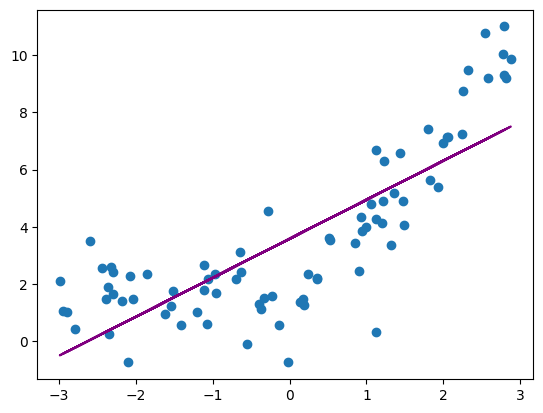

In [7]:
plt.plot(X_train, regression_1.predict(X_train), color="purple")
plt.scatter(X_train, y_train)

## Lets apply polynomial transformation

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly) # it is in form of h0(x) = B0 * 2 + B1X1^2 + B1X2^2
print(X_test_poly)
# bias, x1, x2

[[ 1.00000000e+00 -1.06686770e+00  1.13820669e+00]
 [ 1.00000000e+00  1.48902726e+00  2.21720219e+00]
 [ 1.00000000e+00 -1.35044548e-01  1.82370298e-02]
 [ 1.00000000e+00 -3.35301381e-01  1.12427016e-01]
 [ 1.00000000e+00  1.31261216e+00  1.72295069e+00]
 [ 1.00000000e+00  2.31686185e+00  5.36784883e+00]
 [ 1.00000000e+00  5.13885779e-01  2.64078594e-01]
 [ 1.00000000e+00 -2.94598113e+00  8.67880479e+00]
 [ 1.00000000e+00 -1.51027314e+00  2.28092495e+00]
 [ 1.00000000e+00  2.53702600e+00  6.43650090e+00]
 [ 1.00000000e+00  1.92875270e+00  3.72008698e+00]
 [ 1.00000000e+00  1.12352897e+00  1.26231734e+00]
 [ 1.00000000e+00  9.30019748e-01  8.64936733e-01]
 [ 1.00000000e+00  2.77247789e+00  7.68663367e+00]
 [ 1.00000000e+00 -2.78764230e+00  7.77094957e+00]
 [ 1.00000000e+00 -6.95651817e-01  4.83931450e-01]
 [ 1.00000000e+00 -2.10395873e+00  4.42664235e+00]
 [ 1.00000000e+00  2.25312909e+00  5.07659071e+00]
 [ 1.00000000e+00 -1.54535826e+00  2.38813216e+00]
 [ 1.00000000e+00 -2.27522388e-

In [9]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9229347342360035


In [10]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.41410052 0.50329476]]
[2.10529339]


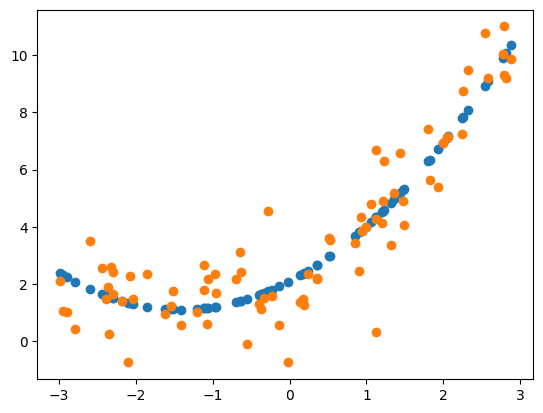

In [11]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

## using degree 3

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.921429447937684


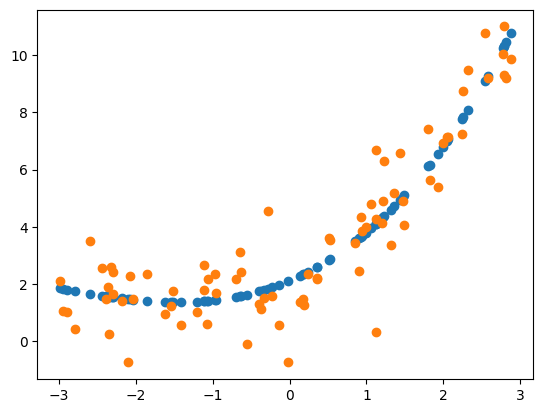

In [14]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

## prediction of new data

In [15]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

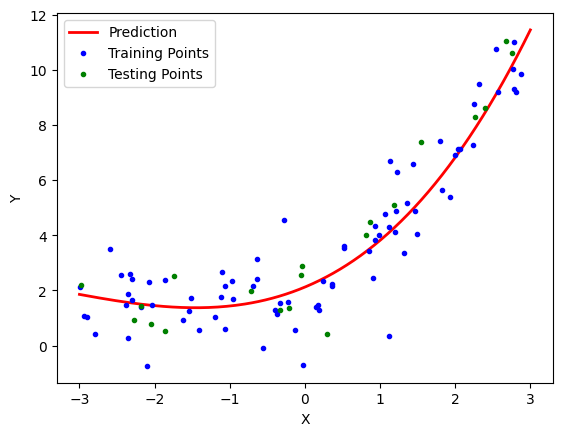

In [16]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()